## 5. Petrophysical Calculations

Created By: Andy McDonald

The following tutorial illustrates how to calculate key petrophysical properties using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Shale Volume Function

In [2]:
def shale_volume(gamma_ray, gamma_ray_max, gamma_ray_min):
    vshale = (gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min)
    return round(vshale, 4)

In [3]:
shale_volume(120, 200, 15)

0.5676

#### Density Porosity Function

In [4]:
def density_porosity(input_density, matrix_density, fluid_density):
    denpor = (matrix_density - input_density) / (matrix_density - fluid_density)
    return round(denpor, 4)

In [5]:
density_porosity(2.45, 2.65, 1)

0.1212

#### Water Saturation Functions

In [6]:
def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = ((archieA / (porosity ** archieM)) * (rw/rt))**(1/archieN)
    return sw

In [7]:
sw_archie(0.1, 10, 0.1, 1, 2, 2)

1.0

In [8]:
# equations from https://www.spec2000.net/01-quickmath.htm
def sw_simandoux(phie, rt, rw, archieA, archieM, archieN, vshale, rshale):
    A = (1 - vshale) * archieA * rw / (phie ** archieM)
    B = A * vshale / (2 * rshale)
    C = A / rt
    
    sw = ((B **2 + C)**0.5 - B) **(2 / archieN)
    return sw

In [9]:
sw_simandoux(0.1, 10, 0.1, 1, 2, 2, 0.3, 2)

0.4627373132569206

### Loading Well Data From CSV

In [10]:
well = pd.read_csv("Data/15_9-19.csv", header=0, skiprows=[1])

In [11]:
well.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
0,3500.0183,9.315,0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855
1,3500.1707,9.324,0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897
2,3500.3231,9.338,0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940
3,3500.4755,9.329,0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982
4,3500.6279,9.328,0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025


In [12]:
well.replace(-999.00, np.nan, inplace=True)

In [13]:
well.describe()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
count,4101.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3817.000000,3904.000000,3842.000000,3842.000000,3842.000000,3842.000000,3902.000000,3903.000000,3905.000000,3842.000000,3905.000000
mean,3812.438300,8.782929,0.0,80.918894,80.918894,150.556435,150.556435,54.641506,0.213049,0.092930,0.091753,0.123694,0.122504,2.448205,2.448222,7.325373,0.019713,102.852614
std,180.441761,0.535479,0.0,14.104999,14.104999,34.903100,34.903100,62.073152,0.370567,0.073644,0.072675,0.071207,0.070314,0.126630,0.126652,38.090478,0.000748,4.774848
min,3500.018300,6.883000,0.0,58.604200,58.604200,112.136400,112.136400,3.761000,0.055000,0.010000,0.010000,0.010000,0.010000,1.991100,1.991000,0.075000,0.018500,94.585500
25%,3656.228300,8.284000,0.0,72.259900,72.259900,128.474400,128.474400,24.211000,0.139800,0.031300,0.031200,0.062200,0.061925,2.362025,2.362000,1.558100,0.019100,98.719100
50%,3812.438300,8.843000,0.0,77.531600,77.531600,137.789900,137.789900,37.503000,0.175900,0.069450,0.068800,0.115450,0.114400,2.466900,2.467000,2.081000,0.019700,102.852600
75%,3968.648300,9.233000,0.0,84.813900,84.813900,160.724000,160.724000,67.172000,0.233225,0.145500,0.142400,0.177625,0.174200,2.551000,2.551000,4.500000,0.020400,106.986200
max,4124.858300,10.370000,0.0,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,0.338500,0.418900,0.380300,3.019400,3.020000,1920.751000,0.021100,111.119700


(0, 250)

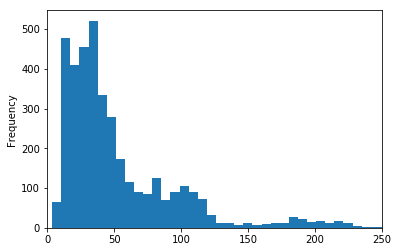

In [14]:
well['GR'].plot(kind='hist', bins=230)
plt.xlim(0, 250)

### Calculate Petrophysical Properties

Using the functions created above, we can pass through the required columns in order to calculate the key petrophysical properties

In [15]:
#Calculate Shale Volume
well['VSHALE'] = shale_volume(well['GR'], well['GR'].quantile(q=0.99),
                             well['GR'].quantile(q=0.01))

In [16]:
#Calculate density porosity
well['PHI'] = density_porosity(well['RHOB'], 2.65, 1)

In [17]:
#Calculate PHIE
well['PHIECALC'] = well['PHI'] - (well['VSHALE'] * 0.3)

In [18]:
well.head(10)

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,...,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE,PHI,PHIECALC
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,...,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855,0.1314,0.1150,0.07558
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,...,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897,0.1302,0.1103,0.07124
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,...,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940,0.1032,0.1073,0.07634
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,...,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982,0.0986,0.1230,0.09342
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,...,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025,0.0869,0.1236,0.09753
5,3500.7803,9.331,0.0,78.7490,78.7490,155.8588,155.8588,24.997,0.1716,0.1276,...,0.1280,0.1251,2.4490,2.449,1.738,0.0211,94.6067,0.0756,0.1218,0.09912
6,3500.9327,9.333,0.0,78.7119,78.7119,154.3660,154.3660,20.609,0.1612,0.1090,...,0.1090,0.1088,2.4789,2.479,1.813,0.0211,94.6109,0.0545,0.1037,0.08735
7,3501.0851,9.313,0.0,78.5689,78.5689,153.1059,153.1059,18.349,0.1586,0.1171,...,0.1171,0.1152,2.4661,2.466,1.887,0.0211,94.6152,0.0436,0.1115,0.09842
8,3501.2375,9.327,0.0,78.3028,78.3028,151.6804,151.6804,16.766,0.1660,0.1286,...,0.1286,0.1246,2.4481,2.448,1.924,0.0211,94.6194,0.0360,0.1224,0.11160
9,3501.3899,9.334,0.0,77.9408,77.9408,150.9345,150.9345,17.086,0.1740,0.1096,...,0.1096,0.1087,2.4779,2.478,1.933,0.0211,94.6236,0.0376,0.1043,0.09302


In [19]:
#Calculate Archie SW
well['SW'] = sw_archie(well['PHI'], well['RT'], well['RW'], 1, 2, 2)

In [20]:
#Calculate Simandoux SW
well['SW_SIM'] = sw_simandoux(well['PHIECALC'], well['RT'], well['RW'], 1, 2, 2, well['VSHALE'],2)

In [21]:
#Limit SW to 1
well['SW_LIM'] = well['SW'].mask(well['SW']>1, 1)
well['SW__SIM_LIM'] = well['SW_SIM'].mask(well['SW_SIM']>1, 1)

In [22]:
well.describe()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,...,RT,RW,TEMP,VSHALE,PHI,PHIECALC,SW,SW_SIM,SW_LIM,SW__SIM_LIM
count,4101.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3817.000000,3904.000000,3842.000000,...,3905.000000,3842.000000,3905.000000,3817.000000,3902.000000,3814.000000,3842.000000,3768.000000,3842.000000,3768.000000
mean,3812.438300,8.782929,0.0,80.918894,80.918894,150.556435,150.556435,54.641506,0.213049,0.092930,...,7.325373,0.019713,102.852614,0.217976,0.122300,0.057599,1.881747,1.720901,0.787412,0.830683
std,180.441761,0.535479,0.0,14.104999,14.104999,34.903100,34.903100,62.073152,0.370567,0.073644,...,38.090478,0.000748,4.774848,0.298183,0.076745,0.108767,21.107167,1.519692,0.311742,0.315211
min,3500.018300,6.883000,0.0,58.604200,58.604200,112.136400,112.136400,3.761000,0.055000,0.010000,...,0.075000,0.018500,94.585500,-0.026400,-0.223900,-2.274540,0.020678,0.005768,0.020678,0.005768
25%,3656.228300,8.284000,0.0,72.259900,72.259900,128.474400,128.474400,24.211000,0.139800,0.031300,...,1.558100,0.019100,98.719100,0.071800,0.060000,0.002768,0.708481,0.879870,0.708481,0.879870
50%,3812.438300,8.843000,0.0,77.531600,77.531600,137.789900,137.789900,37.503000,0.175900,0.069450,...,2.081000,0.019700,102.852600,0.135600,0.111000,0.041630,0.984741,1.353441,0.984741,1.000000
75%,3968.648300,9.233000,0.0,84.813900,84.813900,160.724000,160.724000,67.172000,0.233225,0.145500,...,4.500000,0.020400,106.986200,0.278200,0.174500,0.105815,1.403913,2.242681,1.000000,1.000000
max,4124.858300,10.370000,0.0,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,...,1920.751000,0.021100,111.119700,7.485800,0.399300,0.308380,1129.030687,16.954536,1.000000,1.000000


### Creating a Log Plot to Display the Results

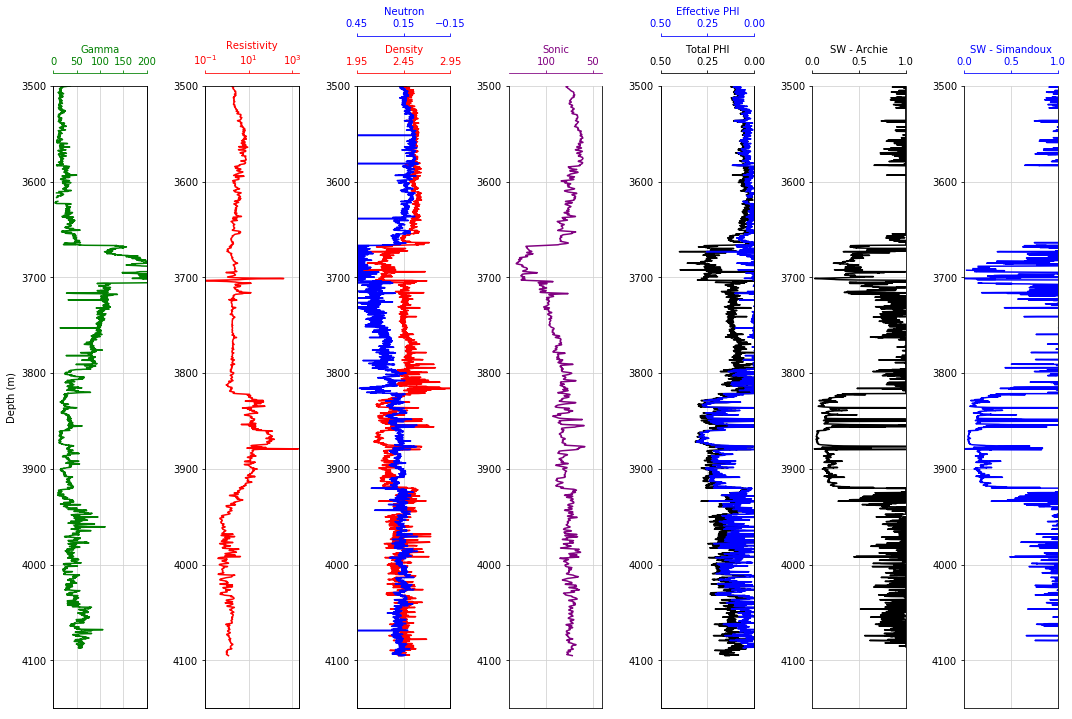

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax7 = ax6.twiny()
ax8 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot("RT", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPTH", data = well, color = "purple")
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot("NPHI", "DEPTH", data = well, color = "blue")
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

# Porosity track
ax6.plot("PHI", "DEPTH", data = well, color = "black")
ax6.set_xlabel("Total PHI")
ax6.set_xlim(0.5, 0)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xticks([0, 0.25, 0.5])

# Porosity track
ax7.plot("PHIECALC", "DEPTH", data = well, color = "blue")
ax7.set_xlabel("Effective PHI")
ax7.set_xlim(0.5, 0)
ax7.xaxis.label.set_color("blue")
ax7.tick_params(axis='x', colors="blue")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.spines["top"].set_edgecolor("blue")
ax7.set_xticks([0, 0.25, 0.5])

# Sw track
ax8.plot("SW_LIM", "DEPTH", data = well, color = "black")
ax8.set_xlabel("SW - Archie")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0, 0.5, 1])

# Sw track
ax9.plot("SW_SIM", "DEPTH", data = well, color = "blue")
ax9.set_xlabel("SW - Simandoux")
ax9.set_xlim(0, 1)
ax9.xaxis.label.set_color("blue")
ax9.tick_params(axis='x', colors="blue")
ax9.spines["top"].set_edgecolor("blue")
ax9.set_xticks([0, 0.5, 1])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax6, ax8, ax9]:
    ax.set_ylim(4150, 3500)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()